# Homework 5

## REST API

In this exercise we will fetch data in JSON format with information on the Nobel prizes in physics and using the retrieved data, extract all the prize motivations from the JSON-list and visualise the frequencies using a word cloud.

In [121]:
import requests
import wordcloud as wc
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup 
import re

In [123]:
# Making a get requests to URI
URI = 'http://api.nobelprize.org/2.0/nobelPrizes?limit=200&nobelPrizeYear=1901&yearTo=2024&nobelPrizeCategory=phy'
response = requests.get(URI)
data = response.json()    

#data['nobelPrizes'][0]['laureates'][0]['motivation']['en'] #finding the list/dictionary where motivation resides. 

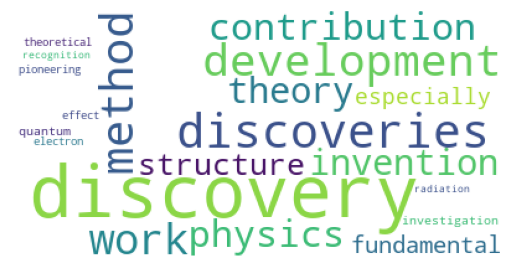

In [125]:
motivation = ''

#for-loop to extract motivation 
for i in range(len(data['nobelPrizes'])): 
    if 'laureates' in data['nobelPrizes'][i]:
        motivation += f'{data['nobelPrizes'][i]['laureates'][0]['motivation']['en']} '

#replace since the hyphen makes python think there are two words 
motivation = motivation.replace('X-rays', 'Xrays')

stopwords = set(wc.STOPWORDS)
wordcloud = wc.WordCloud(background_color ='white', stopwords=stopwords, max_words = 20).generate(motivation)
plt.axis('off')
plt.imshow(wordcloud)

## Web Scraping

We scrape upc, title, price and rating for 60 books. 

In [129]:
titles = []
ratings = []
prices = []
upcs = []

for i in range(3): #three pages á 20 books
    url = f'https://books.toscrape.com/catalogue/page-{i+1}.html'
    r = requests.get(url) 
    html = BeautifulSoup(r.content)
    ol = html.find('ol')
    
    for li in ol.find_all('li'):
        url2 = f'https://books.toscrape.com/catalogue/{li.h3.a['href']}'
        r2 = requests.get(url2)
        html2 = BeautifulSoup(r2.content)
        
        title = html2.find('div', class_ = 'col-sm-6 product_main').h1.text
        price = html2.find('p', class_ = 'price_color').text
        stars = html2.find('p', class_ = 'price_color').find_next('p').find_next('p')['class'][1]
        
        table = html2.find('table', class_ = 'table table-striped')
        upc = table.tr.td.text 
            
        titles.append(title)
        ratings.append(stars)
        prices.append(price)
        upcs.append(upc)    

We now display our scraped data as requested.

In [136]:
scraped = {'upc':upcs, 'title':titles, 'price':prices, 'rating':ratings}

pd.DataFrame(scraped).head()

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
